In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
boxscores = pd.read_csv('./data/box_scores10242023')

In [38]:
boxscores

,Unnamed: 0,PLAYER,MP,FG,FGA,FG%,3P,3PA,3P%,FT,...,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,BPM
0,0,D'Angelo Russell,3611,4,12,0.333,2,5,0.400,1,...,13.3,6.2,26.0,1.4,0.0,18.9,19.2,91,125,-6.9
1,1,Anthony Davis,3409,6,17,0.353,1,2,0.500,4,...,24.6,13.1,17.3,0.0,4.9,9.6,26.6,100,122,-2.2
2,2,Austin Reaves,3120,4,11,0.364,1,2,0.500,5,...,15.3,14.3,17.6,3.2,0.0,12.4,22.4,113,121,1.6
3,3,Taurean Prince,2953,6,8,0.750,4,6,0.667,2,...,8.0,5.6,5.1,0.0,2.8,10.1,14.5,175,128,10.9
4,4,LeBron James,2900,10,16,0.625,1,4,0.250,0,...,29.0,15.4,33.9,1.7,0.0,0.0,24.8,141,122,12.4
5,5,Gabe Vincent,2218,3,8,0.375,0,4,0.000,0,...,0.0,2.5,12.5,2.3,0.0,20.0,19.6,77,126,-11.7
6,6,Cam Reddish,1738,2,4,0.500,1,2,0.500,2,...,13.6,12.7,0.0,0.0,4.8,0.0,12.1,163,125,2.7
7,7,Christian Wood,1528,3,4,0.750,0,1,0.000,1,...,23.3,14.4,0.0,0.0,0.0,17.0,16.6,118,127,-3.8
8,8,Rui Hachimura,1439,3,10,0.300,0,3,0.000,0,...,8.2,11.4,0.0,0.0,0.0,0.0,29.8,79,130,-17.8
9,9,Jaxson Hayes,654,0,0,NaN,0,0,NaN,0,...,17.4,8.1,0.0,0.0,0.0,NaN,0.0,0,128,-9.6


In [67]:
boxscores.columns[1:]

Index(['PLAYER', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       '+/-', 'TS%', 'eFG%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'BPM'],
      dtype='object')

In [40]:
pd.isna(boxscores).sum()

Unnamed: 0     0
PLAYER         0
MP             0
FG             0
FGA            0
FG%            6
3P             0
3PA            0
3P%           10
FT             0
FTA            0
FT%           20
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
+/-            0
TS%            6
eFG%           6
3PAr           6
FTr            6
ORB%           0
DRB%           0
TRB%           0
AST%           0
STL%           0
BLK%           0
TOV%           6
USG%           0
ORtg           0
DRtg           0
BPM            0
dtype: int64

In [41]:
boxscores['FG%'] = boxscores['FG%'].fillna(0)
boxscores['3P%'] = boxscores['3P%'].fillna(0)
boxscores['FT%'] = boxscores['FT%'].fillna(0)
boxscores['TS%'] = boxscores['TS%'].fillna(0)
boxscores['eFG%'] = boxscores['eFG%'].fillna(0)
boxscores['3PAr'] = boxscores['3PAr'].fillna(0)
boxscores['FTr'] = boxscores['FTr'].fillna(0)

In [42]:
X = boxscores[["MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "FT", "FTA", "FT%", "TS%", "eFG%", "3PAr", "FTr", "ORtg"]]
y = boxscores["PTS"]

Text(0.5, 1.0, 'Correlation Heatmap')

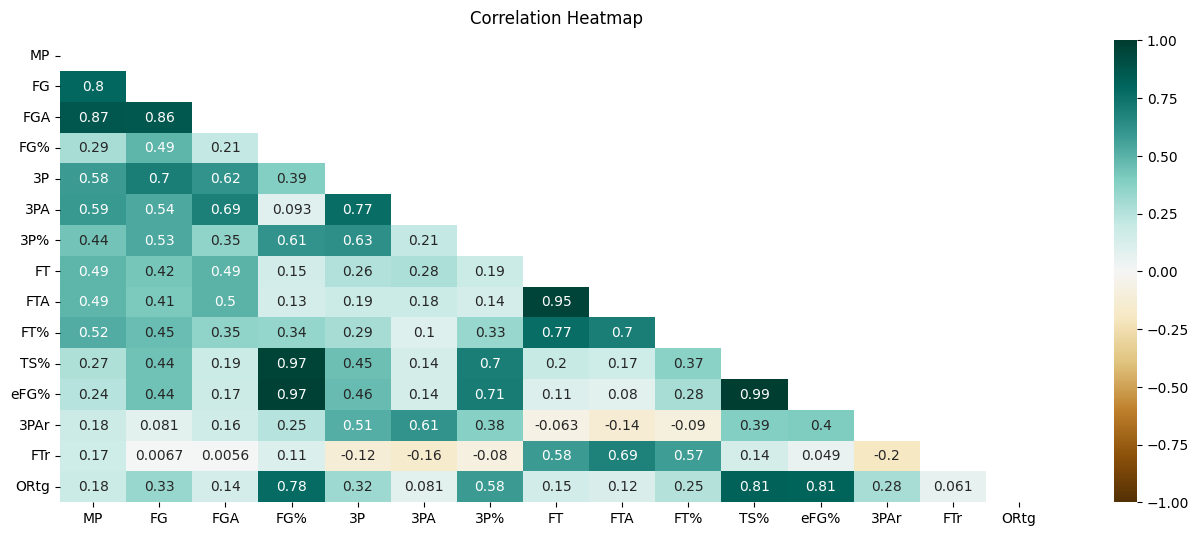

In [76]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=8)

In [56]:
params = {"n_estimators": 500,
			"max_depth": 4,
			"min_samples_split": 5,
			"learning_rate": 0.01,
			"loss": "squared_error"}

xgb = GradientBoostingRegressor(**params)
xgb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [57]:
y_pred = xgb.predict(X_test)

In [58]:
res = pd.DataFrame(list(y_test), columns=['Actual'])
res['Predicted'] = y_pred
res['Predicted'] = res['Predicted'].apply(lambda x: round(x * 2) / 2)
res


,Actual,Predicted
0,10,11.5
1,0,0.5
2,29,28.5
3,11,12.0
4,8,7.0
5,0,0.0
6,4,3.0
7,11,12.0
8,18,24.5


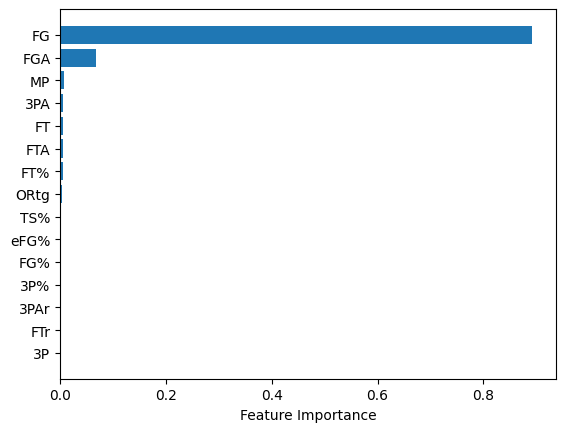

In [65]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()